In [25]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json
from matplotlib.backends.backend_pdf import PdfPages

_plot_params = 0
def plot_init( numrows, numcols, axis = True ):
    plt.figure( figsize = ( numcols * 8, numrows * 4  ) )
    global _plot_params
    _plot_params = [ numrows, numcols, 0 ]
    if( axis ):
        plot_next()
def plot_next():
    _plot_params[2] += 1
    plt.subplot( *_plot_params )

In [20]:
folder = "20220304_Delta_SmallSide_20220304"

In [21]:
# Load data

p = Path( folder + "/" )
dirs = [f for f in p.iterdir() if f.is_dir()]
data = []

def load( filename ):
    text = filename.read_text()
    text = text.replace("nan","0")
    text = text.replace("False", "false" )
    text = text.replace("True", "true" )
    text = text.replace(",]", "]" )
    return json.loads( text )

for d in dirs:
    item = {}
    item.update( load( d / 'details.txt'     ) )
    item.update( load( d / 'deposition.txt'  ) )
    item.update( load( d / 'percolation.txt' ) )
    data.append(item)

sides = np.array( [ item['side'] for item in data ] )
for s in np.unique( sides ):
    print( s, ":\t", np.sum( sides == s ) )

64 :	 48
128 :	 48
256 :	 48


In [22]:
# useful data
color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

polys = np.unique(  [i['dep_polymers'] for i in data] )
gammas = np.unique( [i['gamma'] for i in data]        )
qs =     np.unique( [i['defects_frac'] for i in data] )
sides =  np.unique( [i['side'] for i in data] )

In [23]:
with PdfPages( folder + "_anal/convergence.pdf" ) as pdf:
    for d in data:
        plt.figure()    
        
        plt.semilogy( d['occupation_fraction_std_history'])

        plt.ylim( np.mean( d['occupation_fraction_std_history'] ) / 3, 3 * np.mean( d['occupation_fraction_std_history'] ) )

        pdf.savefig()

        plt.close()

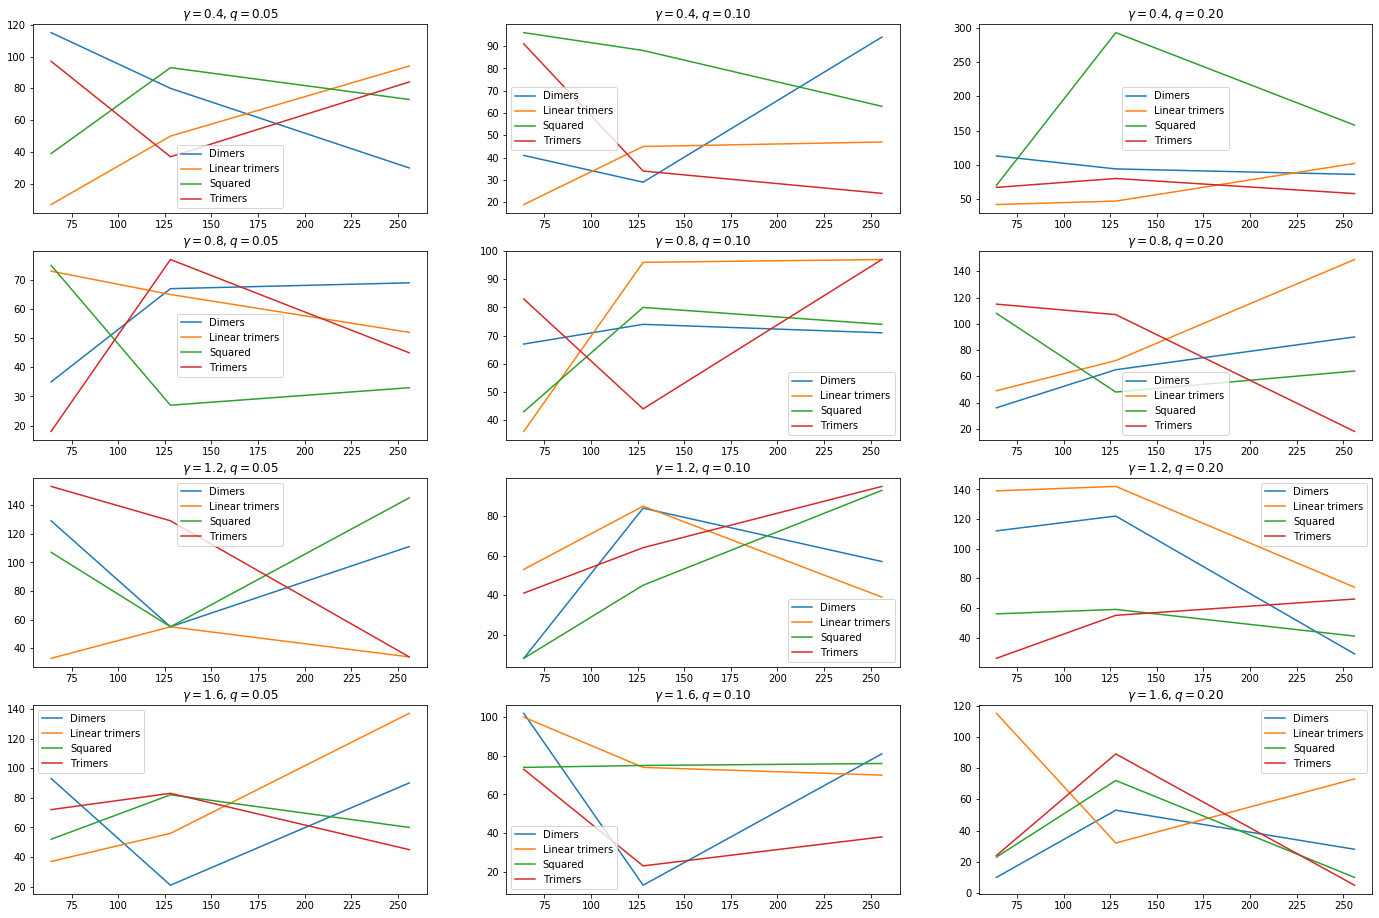

In [28]:
plot_init( gammas.size, qs.size, False )
yl = max( [ i['runned_chunks'] for i in data ] )

for g in gammas:
    for q in qs:
        plot_next()
        for i_p, p in enumerate( polys ):
            dataset = [ v for v in data if v['dep_polymers'] == p and  v['defects_frac'] == q and  v['gamma'] == g ]
            dataset.sort( key=lambda a: a['side'] )
            x = [ v['side'] for v in dataset ]
            y = [ v['runned_chunks'] for v in dataset ]

            plt.plot(
                x,
                y,
                color = color_list[ i_p ],
                label = p
            )

        plt.legend()
        plt.title( fr"$\gamma = {g:.1f}, q = {q:.2f}$")